In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [3]:
rng = np.random.RandomState(42)

In [4]:
# generate train data
X = 0.3 * rng.randn(100,2)
X_train = np.r_[X + 2,X - 2]
# generate some regular novel observations
X = 0.3 * rng.randn(20,2)
X_test = np.r_[X + 2,X - 2]
# generate some abnormal novel observations
X_outliers = rng.uniform(low=-4,high=4,size=(20,2))

In [5]:
# fit the model
clf = IsolationForest(behaviour='new',max_samples=100,random_state=rng,contamination='auto')
clf.fit(X_train)

IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
        max_features=1.0, max_samples=100, n_estimators=100, n_jobs=None,
        random_state=<mtrand.RandomState object at 0x00000295FD8E5120>,
        verbose=0)

In [6]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

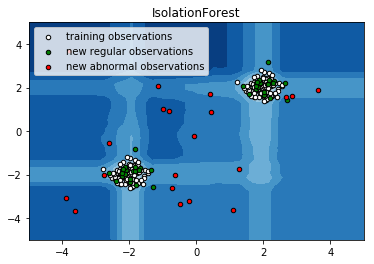

In [9]:
xx,yy = np.meshgrid(np.linspace(-5,5,50),np.linspace(-5,5,50))
Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("IsolationForest")
plt.contourf(xx,yy,Z,cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

In [11]:
X_train[:5]

array([[2.14901425, 1.95852071],
       [2.19430656, 2.45690896],
       [1.92975399, 1.92975891],
       [2.47376384, 2.23023042],
       [1.85915768, 2.16276801]])

In [12]:
X_outliers[:5]

array([[-0.48822863, -3.37234895],
       [-3.79719405,  3.70118732],
       [ 2.68784096,  1.56779365],
       [-0.72837644, -2.61364544],
       [-2.74850366, -1.99805681]])